# Regresión Lineal (replicación de resultados)
- Hecho por: Francisco Devaux
- Replicado por: Agustín Yornet de Rosas

## Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

## Carga de dataset

In [5]:
vehicles = pd.read_csv('/home/agustin/Documentos/ia2/práctica/linear regression/vehicle_data.csv')
vehicles.dropna()
vehicles.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


## Análisis de los datos
Dentro de las columnas del dataset, destacan las siguientes características:

- Make: Marca del vehículo

- Model: Modelo del vehículo

- Price: Precio del vehículo

- Year: Año de fabricación del vehículo

- Kilometer: Kilometraje del vehículo
- Fuel Type: Tipo de combustible del vehículo
- Owner: Número de dueños anteriores
- Length: Longitud del vehículo
- Width: Ancho del vehículo
- Height: Altura del vehículo
- Fuel Tank Capacity: Capacidad del tanque de combustible

A continuación, se muestra un boxplot de la variable objetivo 'Price'.

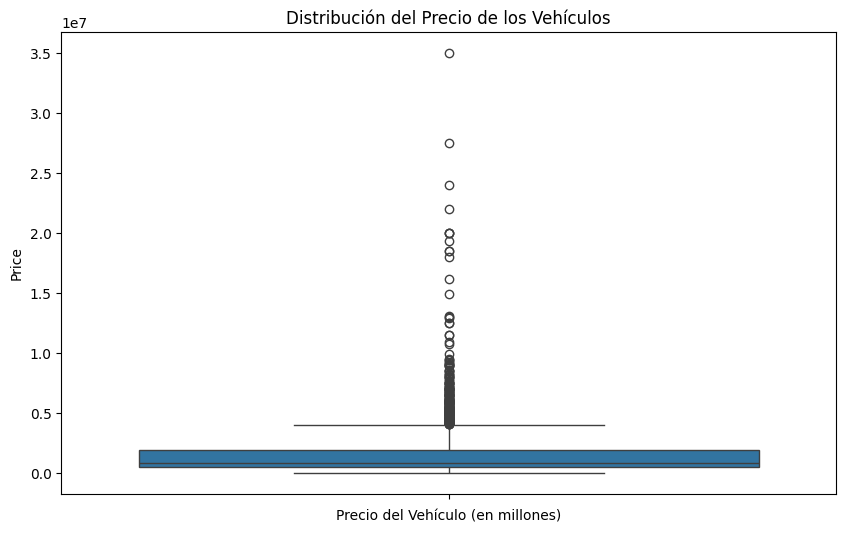

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(vehicles['Price'])
plt.xlabel('Precio del Vehículo (en millones)')
plt.title('Distribución del Precio de los Vehículos')
plt.show()

Como se puede observar en el boxplot, existen valores atípicos en la variable 'Price'. A continuación, se procede a eliminar estos valores atípicos para evitar ruido en nuestros datos.

In [7]:
Q1 = vehicles['Price'].quantile(0.25)
Q3 = vehicles['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
vehicles_no_outliers = vehicles[(vehicles['Price'] >= lower_bound) & (vehicles['Price'] <= upper_bound)]

## Análisis de Correlación

Para seleccionar las características más relevantes para nuestro modelo de regresión, se calcula la matriz de correlación entre las variables numéricas del dataset, habiendo convertido las variables categóricas previamente. Luego, se filtran las correlaciones de la variable objetivo 'Price' mayores a 0.4.

In [8]:
data_dummies = pd.get_dummies(vehicles_no_outliers, drop_first=True)
correlation_matrix = data_dummies.corr()
high_correlation = correlation_matrix['Price'][correlation_matrix['Price'] > 0.4]
print(high_correlation)

Price                 1.000000
Length                0.650667
Width                 0.670427
Fuel Tank Capacity    0.641834
Name: Price, dtype: float64


Al ser las variables 'Length', 'Width' y 'Fuel Tank Capacity' las más correlacionadas con la variable objetivo 'Price', se utilizarán para hacer predicciones utilizando regresión lineal.

Previo a la creación del modelo, se grafican las relaciones entre estas variables y la variable objetivo.

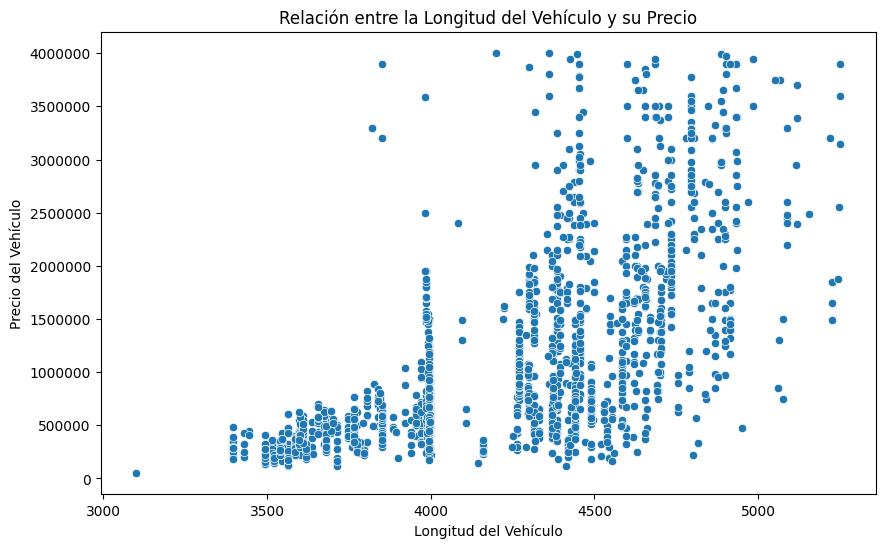

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length', y='Price', data=vehicles_no_outliers)
plt.xlabel('Longitud del Vehículo')
plt.ylabel('Precio del Vehículo')
plt.title('Relación entre la Longitud del Vehículo y su Precio')
plt.ticklabel_format(style = 'plain')
plt.show()

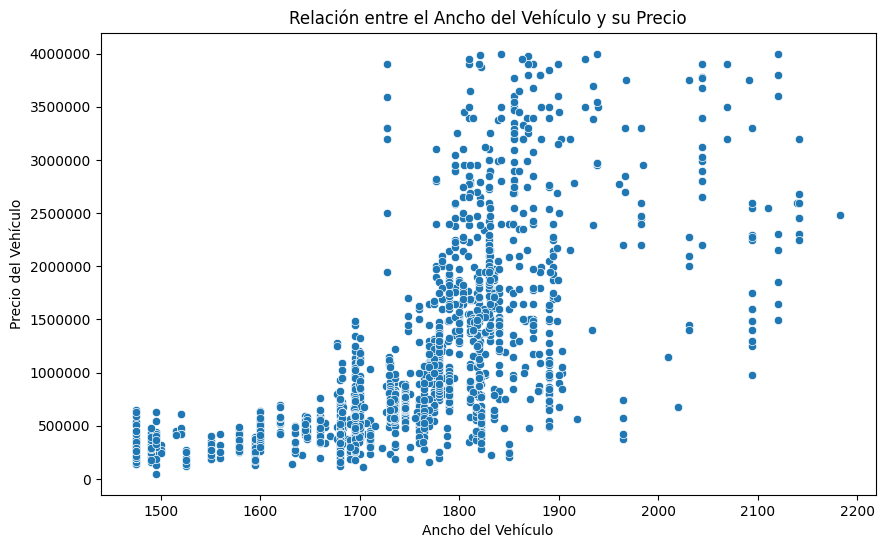

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Width', y='Price', data=vehicles_no_outliers)
plt.xlabel('Ancho del Vehículo')
plt.ylabel('Precio del Vehículo')
plt.title('Relación entre el Ancho del Vehículo y su Precio')
plt.ticklabel_format(style = 'plain')
plt.show()

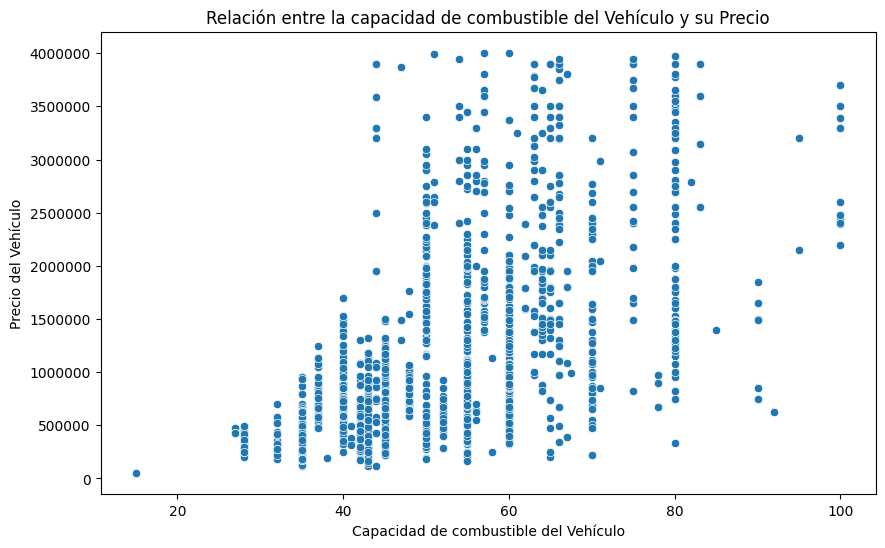

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel Tank Capacity', y='Price', data=vehicles_no_outliers)
plt.xlabel('Capacidad de combustible del Vehículo')
plt.ylabel('Precio del Vehículo')
plt.title('Relación entre la capacidad de combustible del Vehículo y su Precio')
plt.ticklabel_format(style = 'plain')
plt.show()

## Regresión Lineal Simple

A continuación, se procede a entrenar un modelo de regresión lineal para cada una de las variables seleccionadas, y se evalúa su desempeño a través de las métricas de error cuadrático medio (MSE) y coeficiente de determinación (R^2).

Mean Squared Error (MSE): 471728350848.28503
R-squared (R^2): 0.4619231607393385
Coeficientes de la regresión: [1365.0321068]
Intersección de la regresión: -4673583.724441835


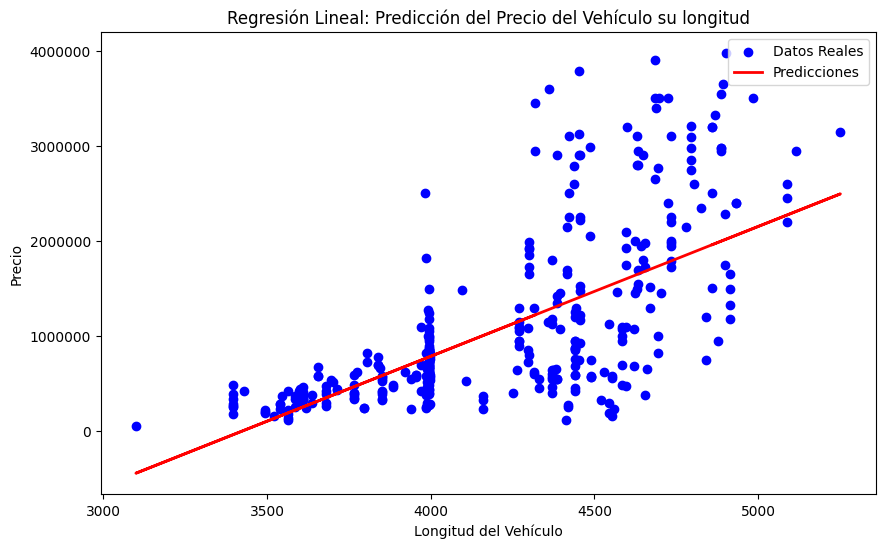

In [12]:
X = vehicles_no_outliers[['Length']]
y = vehicles_no_outliers['Price']

# Eliminar filas con valores nulos en las características y objetivo
X = X.dropna()
y = y.loc[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección de la regresión: {model.intercept_}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Longitud del Vehículo')
plt.ylabel('Precio')
plt.ticklabel_format(style = 'plain')
plt.title('Regresión Lineal: Predicción del Precio del Vehículo su longitud')
plt.legend()
plt.show()

Mean Squared Error (MSE): 483573791671.1038
R-squared (R^2): 0.44841166127968135
Coeficientes de la regresión: [4790.2362969]
Intersección de la regresión: -7287927.00071168


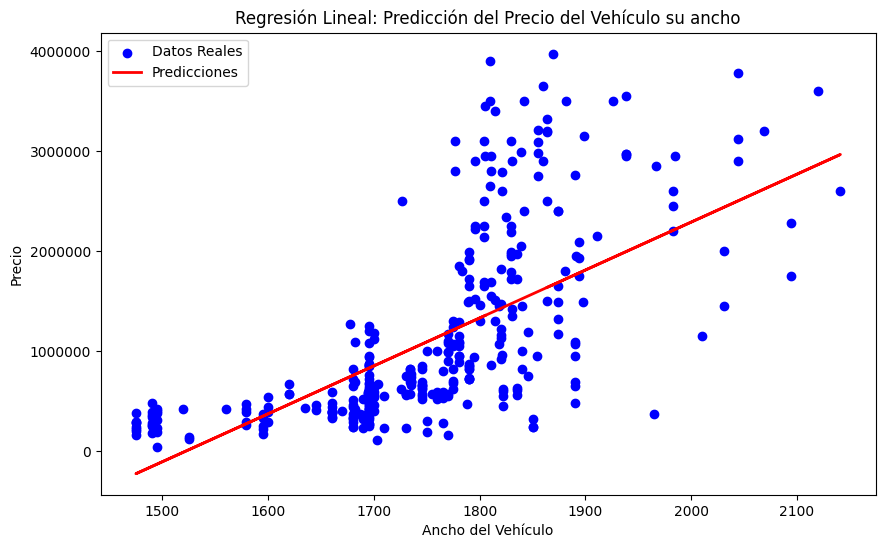

In [13]:
X = vehicles_no_outliers[['Width']]
y = vehicles_no_outliers['Price']

# Eliminar filas con valores nulos en las características y objetivo
X = X.dropna()
y = y.loc[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección de la regresión: {model.intercept_}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Ancho del Vehículo')
plt.ylabel('Precio')
plt.ticklabel_format(style = 'plain')
plt.title('Regresión Lineal: Predicción del Precio del Vehículo su ancho')
plt.legend()
plt.show()

Mean Squared Error (MSE): 534121814401.77625
R-squared (R^2): 0.38531453029895313
Coeficientes de la regresión: [41648.66436622]
Intersección de la regresión: -1001885.92648509


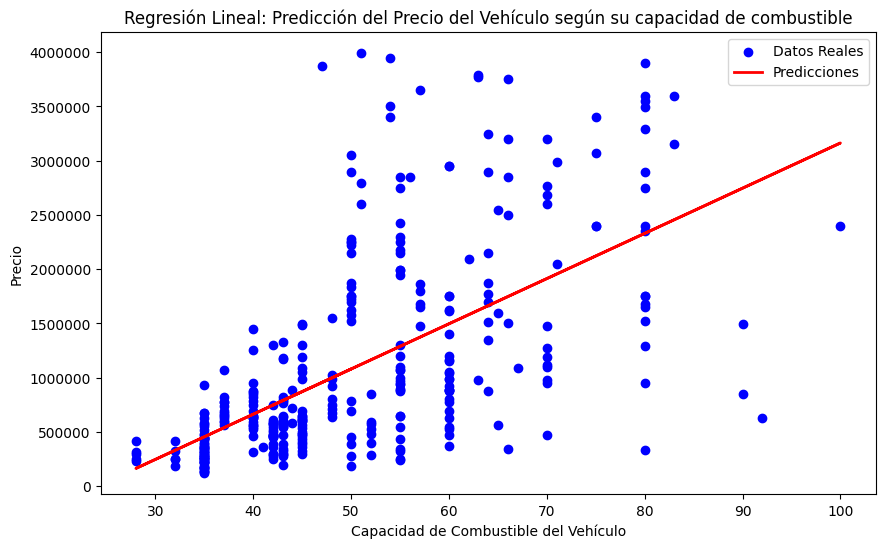

In [14]:
X = vehicles_no_outliers[['Fuel Tank Capacity']]
y = vehicles_no_outliers['Price']

# Eliminar filas con valores nulos en las características y objetivo
X = X.dropna()
y = y.loc[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección de la regresión: {model.intercept_}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Capacidad de Combustible del Vehículo')
plt.ylabel('Precio')
plt.ticklabel_format(style = 'plain')
plt.title('Regresión Lineal: Predicción del Precio del Vehículo según su capacidad de combustible')
plt.legend()
plt.show()

## Regresión Lineal Múltiple

A continuación, se procede a entrenar un modelo de regresión lineal utilizando las tres variables seleccionadas ('Length', 'Width' y 'Fuel Tank Capacity'), y distintas combinaciones de ellas. Luego, se evalúa su desempeño a través de las métricas de error cuadrático medio (MSE) y coeficiente de determinación ($R^2$).

Mean Squared Error (MSE): 470414368937.78784
R-squared (R^2): 0.458631215711522
Coeficientes de la regresión: [24315.73299231   727.14410692]
Intersección de la regresión: -3199342.7469415995


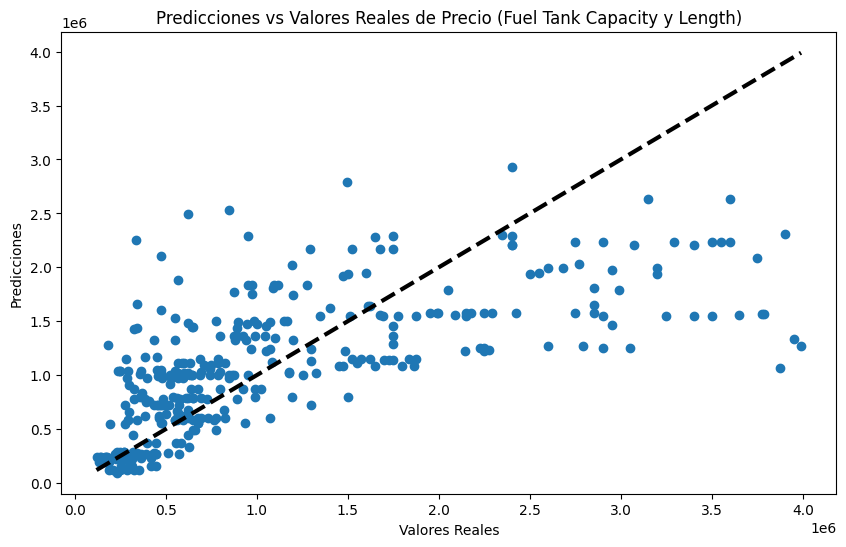

In [15]:
X = vehicles_no_outliers[['Fuel Tank Capacity', 'Length']]
y = vehicles_no_outliers['Price']

# Eliminar filas con valores nulos en las características y objetivo
X = X.dropna()
y = y.loc[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección de la regresión: {model.intercept_}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales de Precio (Fuel Tank Capacity y Length)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

Mean Squared Error (MSE): 453436699502.3748
R-squared (R^2): 0.4781696925719445
Coeficientes de la regresión: [20868.38747485  3138.89160286]
Intersección de la regresión: -5446966.750365581


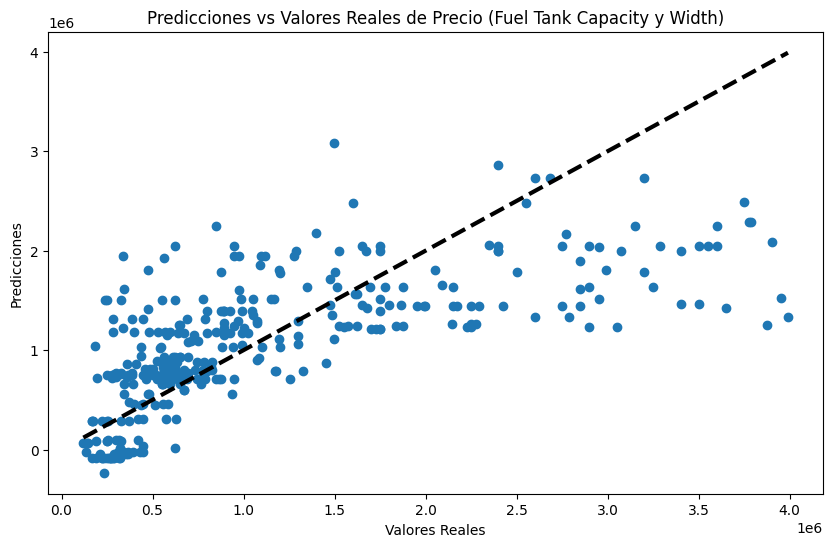

In [16]:
X = vehicles_no_outliers[['Fuel Tank Capacity', 'Width']]
y = vehicles_no_outliers['Price']

# Eliminar filas con valores nulos en las características y objetivo
X = X.dropna()
y = y.loc[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección de la regresión: {model.intercept_}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales de Precio (Fuel Tank Capacity y Width)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

Mean Squared Error (MSE): 435639318009.70984
R-squared (R^2): 0.5030881080799745
Coeficientes de la regresión: [ 618.02502366 3123.18435911]
Intersección de la regresión: -6980377.999436245


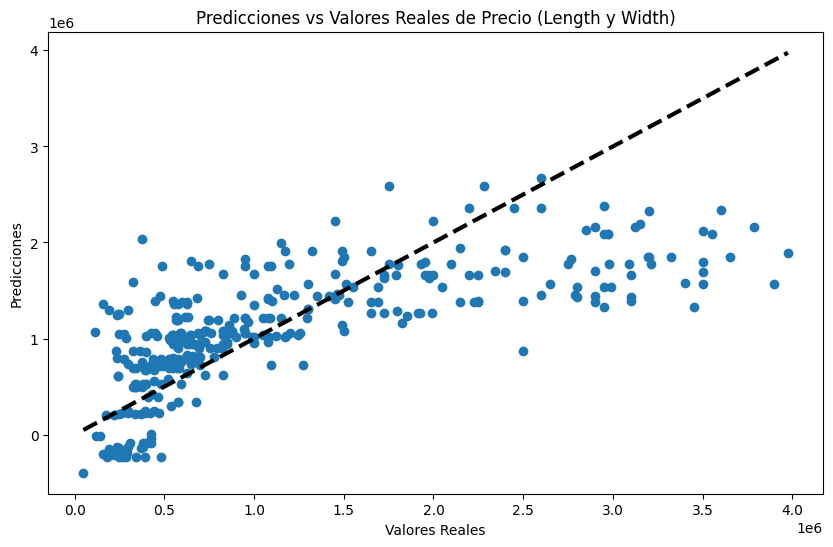

In [17]:
X = vehicles_no_outliers[['Length', 'Width']]
y = vehicles_no_outliers['Price']

# Eliminar filas con valores nulos en las características y objetivo
X = X.dropna()
y = y.loc[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección de la regresión: {model.intercept_}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales de Precio (Length y Width)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

Mean Squared Error (MSE): 440429270757.8482
R-squared (R^2): 0.49313908201054524
Coeficientes de la regresión: [16539.08466857   328.69979623  2609.31824925]
Intersección de la regresión: -5690364.794336878


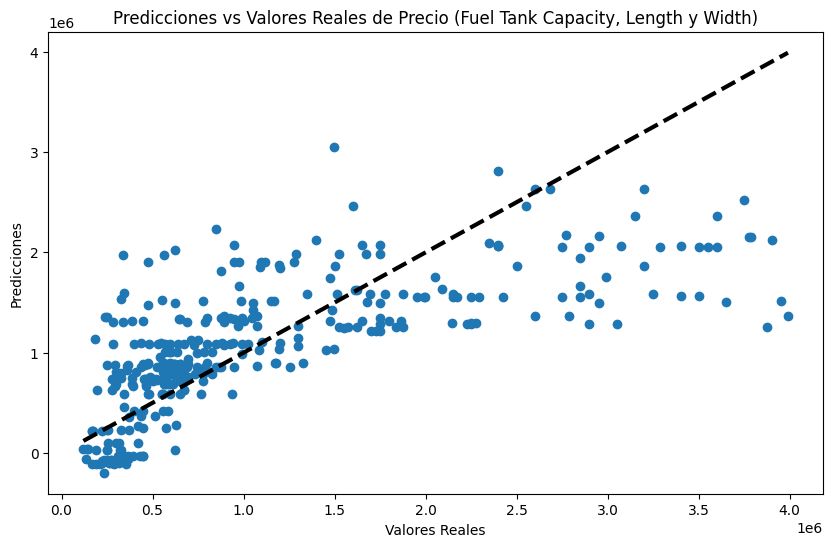

In [18]:
X = vehicles_no_outliers[['Fuel Tank Capacity', 'Length', 'Width']]
y = vehicles_no_outliers['Price']

# Eliminar filas con valores nulos en las características y objetivo
X = X.dropna()
y = y.loc[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección de la regresión: {model.intercept_}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales de Precio (Fuel Tank Capacity, Length y Width)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

## Conclusiones

En este notebook se ha realizado un análisis de regresión lineal aplicado a un dataset de vehículos. Se ha seleccionado un subconjunto de variables numéricas para predecir el precio de los vehículos, y se han entrenado modelos de regresión lineal simple y múltiple.

Los resultados obtenidos muestran que las variables 'Length', 'Width' y 'Fuel Tank Capacity' tienen una correlación significativa con el precio de los vehículos. Tras comparar los distintos modelos realizados, destaca entre todos el creado a partir de las características 'Length' y 'Width', obteniendo mejores resultados en las métricas.